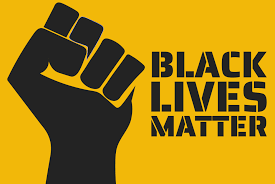

---

# BLACK LIVES MATTER: um olhar para os Negros nos dados do ENEM 2019

# ENEM 


## O que é?
Enem é o Exame Nacional do Ensino Médio, que serve para avaliar o desenvolvimento do estudante e é utilizado como instrumento de ingresso no ensino superior. 
São 5 provas. 
- 4 provas de múltipla escolha:
Ciências da Natureza e suas tecnologias
Ciências Humanas e suas tecnologias
Linguagens, Códigos e suas tecnologias
Matemática e suas tecnologias
- 1 prova de redação

##Quanto custa? 
Atualmente a inscrição custa R$ 85 reais, mas há gratuidade para quem está cursando o último ano do ensino médio em escola pública naquele ano de realização do Enem, ter cursado todo o ensino médio em escola pública ou como bolsista integral em escola particular, e ter renda familiar per capita igual ou menor que um salário mínimo.


##Pra que serve?
Algumas faculdades usam a nota do Enem como alternativa à realização de vestibulares:
USP –  cerca de 25% vagas (2.830) pelo Enem/SiSU 
Unifesp – usa Enem como 1ª fase do vestibular para alguns cursos, e o SiSU para outros
UFABC – todas as vagas pelo Enem/SiSU 
Unesp – nota do Enem 2019 pode ser usada para aumentar nota do vestibular
Unicamp – 20% das vagas (639) via Enem, mas sem aderir ao SiSU 
(Fonte: https://vestibular.brasilescola.uol.com.br/enem/lista-adesao-enem.htm)



##Qual é uma nota boa pro Enem?

Na USP (Universidade de São Paulo), os cursos mais concorridos (como Engenharia, Medicina, Ciências da Computação e outras) exigem nota acima de 800 para ampla concorrência. Cursos como Ciências Contábeis, Estatística, Letras e 
Administração exigem em torno de 750.
(https://descomplica.com.br/tudo-sobre-enem/novidades/usp-sisu-2020/#:~:text=As%20notas%20a%20seguir%20s%C3%A3o,%C3%A9%20superior%20a%20800%20pontos.)

Mais informações sobre notas de corte podem ser encontradas nesse site:
https://melhoresdoenem.com/sisu/notas-de-corte-usp-sisu/ e ainda há um simulador bem interessante em 
https://www.educamaisbrasil.com.br/programas-do-governo/sisu/notas-de-corte.


# São Paulo e a Raça Negra

##A cidade de São Paulo
São Paulo, segundo a Wikipedia, possui o maior PIB municipal do Brasil, era apontada como 10ª cidade mais rica do mundo. (https://pt.wikipedia.org/wiki/Economia_de_S%C3%A3o_Paulo)

Estima-se que a cidade de São Paulo tenha mais de 12 milhões de habitantes. (https://cidades.ibge.gov.br/brasil/sp/sao-paulo/panorama).

Para essa análise, escolhemos a cidade de São Paulo devido a aspectos como a diversidade de influências, origens, carências e riquezas, e a complexidade de problemas urbanos e questões humanas.

##População Negra em São Paulo
Segundo o Censo de 2010, a proporção de negros (pretos e pardos) na cidade era de 32%, com distribuições bastante desde 5% em Moema até 60% no Jardim Ângela. 
(https://www.nossasaopaulo.org.br/wp-content/uploads/2019/11/Mapa_Desigualdade_2019_tabelas.pdf)

No entanto, como será que essa distribuição se reflete na evolução das oportunidades da vida, como por exemplo nas provas do ENEM?

#[Carga e preparação dos dados]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium


In [ ]:
#baixando dados de São Paulo baseado em https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/README.md
estado = "sp"
uri = f"https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/{estado}.csv.zip?raw=true"
arquivo = f'{estado}.csv.zip'
!wget -O $arquivo $uri
dados = pd.read_csv(arquivo, delimiter=';', na_filter=False)

--2020-10-26 01:31:00--  https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/sp.csv.zip?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/alura-cursos/imersao-dados-2-2020/raw/master/por%20estado/sp.csv.zip [following]
--2020-10-26 01:31:00--  https://github.com/alura-cursos/imersao-dados-2-2020/raw/master/por%20estado/sp.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/por%20estado/sp.csv.zip [following]
--2020-10-26 01:31:00--  https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/por%20estado/sp.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githu

In [ ]:
#dados = pd.read_csv(arquivo, delimiter=';')
#mantem apenas os dados dos alunos do município de São Paulo
#df2 = dados[dados['CO_MUNICIPIO_ESC'] == '3550308']
#52696


In [ ]:
#mantem apenas os dados dos inscritos residentes no município de São Paulo
df = dados[dados['CO_MUNICIPIO_RESIDENCIA'] == 3550308.0]
#229837


In [ ]:
#mantem apenas as colunas de interesse para essa análise
df = df[[' NU_INSCRICAO','CO_ESCOLA','NU_IDADE','TP_SEXO','TP_COR_RACA','TP_ESCOLA'
       ,'TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT'
       ,'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','CO_MUNICIPIO_RESIDENCIA','CO_MUNICIPIO_ESC','Q006','Q025 ']]

In [ ]:
df.columns = ['NU_INSCRICAO','CO_ESCOLA','NU_IDADE','TP_SEXO','TP_COR_RACA','TP_ESCOLA'
       ,'TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT'
       ,'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','CO_MUNICIPIO_RESIDENCIA','CO_MUNICIPIO_ESC','Q006','Q025']

In [ ]:
df['CO_ESCOLA'] = df['CO_ESCOLA'].astype('string')
df['TP_SEXO'] = df['TP_SEXO'].astype('string')
df["NU_NOTA_CN"] =  pd.to_numeric(df["NU_NOTA_CN"], errors='coerce')
df["NU_NOTA_CH"] =  pd.to_numeric(df["NU_NOTA_CH"], errors='coerce')
df["NU_NOTA_LC"] =  pd.to_numeric(df["NU_NOTA_LC"], errors='coerce')
df["NU_NOTA_MT"] =  pd.to_numeric(df["NU_NOTA_MT"], errors='coerce')
df["NU_NOTA_REDACAO"] =  pd.to_numeric(df["NU_NOTA_REDACAO"], errors='coerce')
df['CO_MUNICIPIO_ESC'] = df['CO_MUNICIPIO_ESC'].astype('string')
df['Q006'] = df['Q006'].astype('string')
df['Q025'] = df['Q025'].astype('string')


In [ ]:
df["NU_NOTA_TOTAL4"] = df["NU_NOTA_CN"]+df["NU_NOTA_CH"]+df["NU_NOTA_MT"]+df["NU_NOTA_LC"]
df["NU_NOTA_TOTAL5"] = df["NU_NOTA_CN"]+df["NU_NOTA_CH"]+df["NU_NOTA_MT"]+df["NU_NOTA_LC"]+df["NU_NOTA_MT"]
df["NU_NOTA_MEDIA4"] = (df["NU_NOTA_CN"]+df["NU_NOTA_CH"]+df["NU_NOTA_MT"]+df["NU_NOTA_LC"]) / 4
df["NU_NOTA_MEDIA5"] = (df["NU_NOTA_CN"]+df["NU_NOTA_CH"]+df["NU_NOTA_MT"]+df["NU_NOTA_LC"]) / 5


In [ ]:
#cria um indicador se é Raça Negra ou não
df.loc[(df['TP_COR_RACA'] == 2) | (df['TP_COR_RACA'] == 3), 'TP_NEGRO'] = 1
df.loc[(df['TP_COR_RACA'] == 0) | (df['TP_COR_RACA'] == 1) | (df['TP_COR_RACA'] == 4) | (df['TP_COR_RACA'] == 5), 'TP_NEGRO'] = 0


# Inscritos da cidade de de São Paulo


229.837 **residentes na cidade de São Paulo** se increveram para o ENEM 2019

In [ ]:
df['NU_INSCRICAO'].count()

229837

In [ ]:
df.query("TP_NEGRO == 1")['NU_INSCRICAO'].count()

101212

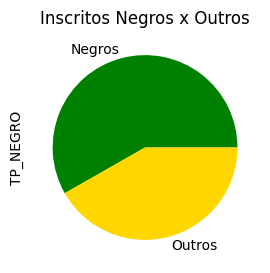

In [ ]:
plt.rcdefaults()
labels = ['Negros', 'Outros']
colors = ['green', 'gold']
df['TP_NEGRO'].value_counts().plot.pie(figsize=(5,3), colors=colors, labels= labels)
plt.title("Inscritos Negros x Outros")
#plt.legend(labels, loc="best")
plt.show()

##Ausentes

In [ ]:
dfausentes = df.query('TP_PRESENCA_CN == 0 & TP_PRESENCA_CH == 0 & TP_PRESENCA_LC == 0 & TP_PRESENCA_MT == 0')

In [ ]:
dfausentes['NU_INSCRICAO'].count()

55340

In [ ]:
55.340 /  229.837

0.24077933491996503

Entre os **229.837 inscritos** da cidade de São Paulo, 55.340 **não compareceram** (**24%**)

Para as análise a seguir, vamos considerar apenas aqueles que fizeram o ENEM, que na cidade de São Paulo foram 174.342.

In [ ]:
df['NU_INSCRICAO'].count()
#174342

229837

In [ ]:
#vamos considerar apenas quem fez a prova
df = df.query(('TP_PRESENCA_CN == 1| TP_PRESENCA_CH == 1 | TP_PRESENCA_LC == 1 | TP_PRESENCA_MT == 1'))

## Perfil dos Candidatos

### Sexo

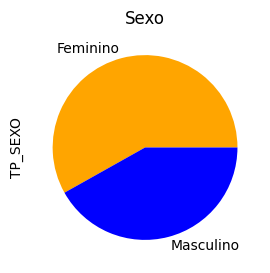

In [ ]:
plt.rcdefaults()
labels = ['Feminino', 'Masculino']
colors = ['orange', 'blue']
df['TP_SEXO'].value_counts().plot.pie(figsize=(5,3), colors=colors, labels= labels)
plt.title("Sexo")
#plt.legend(labels, loc="best")
plt.show()

### Cor, Raça, Etnia

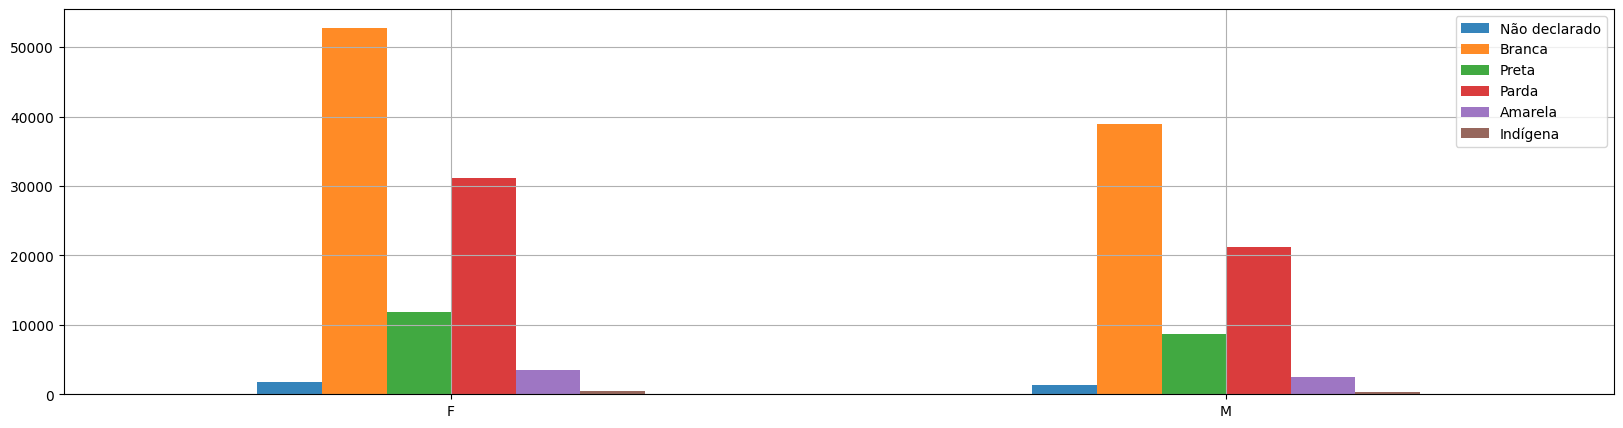

In [ ]:
plt.rcdefaults()
index = df['TP_SEXO'].unique()
dataCor = pd.DataFrame({
    'Não declarado' : df.query("TP_COR_RACA == 0")['TP_SEXO'].value_counts(),
    'Branca' : df.query("TP_COR_RACA == 1")['TP_SEXO'].value_counts(),
    'Preta' : df.query("TP_COR_RACA == 2")['TP_SEXO'].value_counts(),
    'Parda' : df.query("TP_COR_RACA == 3")['TP_SEXO'].value_counts(),
    'Amarela' : df.query("TP_COR_RACA == 4")['TP_SEXO'].value_counts(),
    'Indígena' : df.query("TP_COR_RACA == 5")['TP_SEXO'].value_counts()},
    index = index
    )
grafico = dataCor.plot.bar(rot=0, figsize=(20,5), grid = True, alpha=0.9)



### Faixa Etária

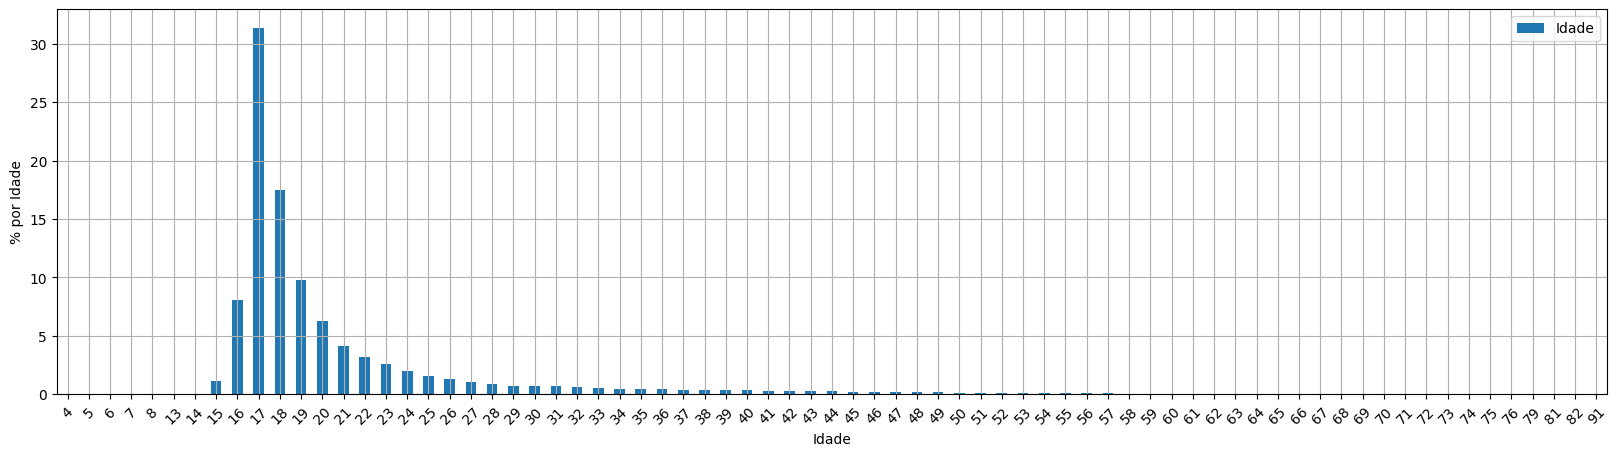

In [ ]:
plt.rcdefaults()
idade = df['NU_IDADE'].value_counts().sort_index().index 
percentual_idade = (df["NU_IDADE"].value_counts().sort_index() / df["NU_IDADE"].count() ) * 100
ax = percentual_idade.plot.bar(xlabel = "Idade", ylabel="% por Idade", figsize= (20,5), grid=True)
ax.set_xticklabels(percentual_idade.index, rotation=45)
ax.legend(["Idade"])


### Renda Familiar

Faixas de Renda (R$)
---

A -	nenhuma renda

B	- até 998

C	- de   998 / 1.497

D	- de 1.497 / 1.996

E - de 1.996 / 2.495

F	- de 2.495 / 2.994

G	- de 2.994 / 3.992

H	- de 3.992 / 4.990

I	- de 4.990 / 5.988

J	- de 5.988 / 6.986

K	- de 6.986 / 7.984

L	- de 7.984 / 8.982

M	- de 8.982 / 9.980

N	- de 9.980 / 11.976

O	- de 11.976 / 14.970

P	- de 14.970 / 19.960

Q	Mais de 19.960






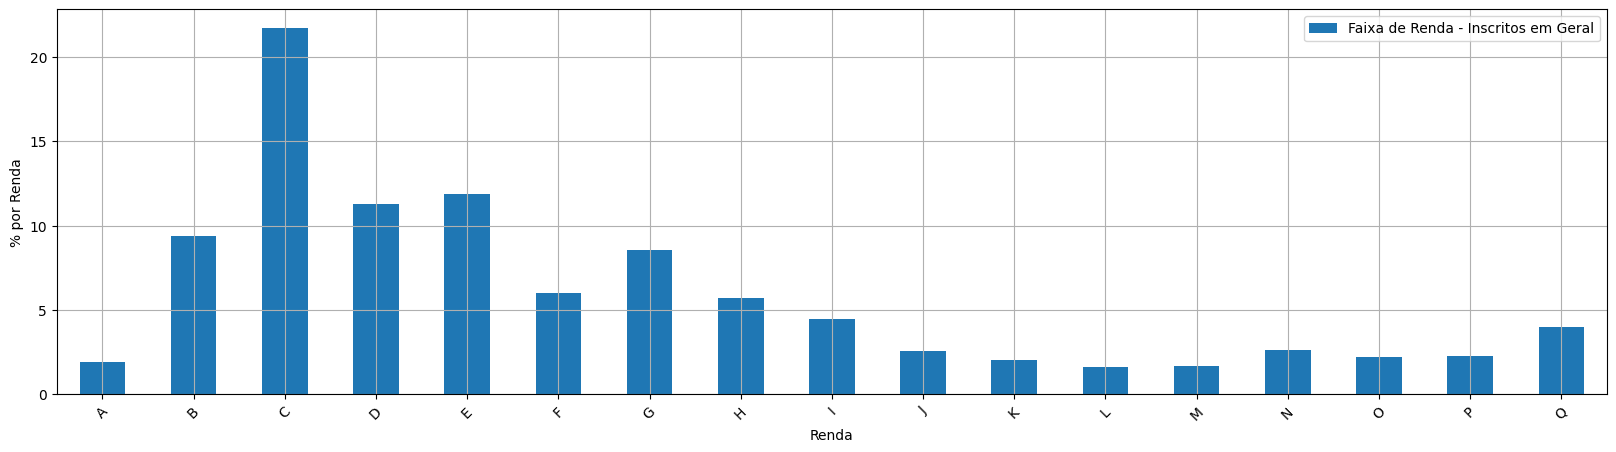

In [ ]:
plt.rcdefaults()
renda = df['Q006'].value_counts().sort_index().index 
percentual_renda = (df["Q006"].value_counts().sort_index() / df["Q006"].count() ) * 100
ax = percentual_renda.plot.bar(xlabel = "Renda", ylabel="% por Renda", figsize= (20,5), grid=True )
ax.set_xticklabels(percentual_renda.index, rotation=45)
ax.legend(["Faixa de Renda - Inscritos em Geral"])


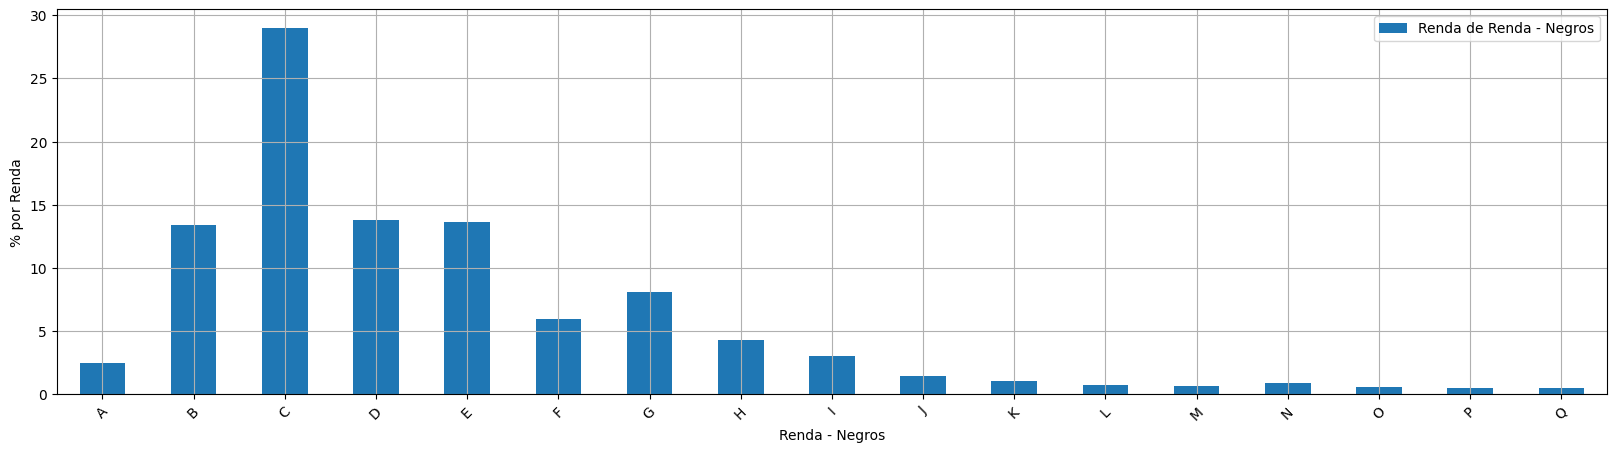

In [ ]:
plt.rcdefaults()
rendaNegro = df.query('TP_NEGRO == 1')['Q006'].value_counts().sort_index().index 
percentual_renda = (df.query('TP_NEGRO == 1')["Q006"].value_counts().sort_index() / df.query('TP_NEGRO == 1')["Q006"].count() ) * 100
ax = percentual_renda.plot.bar(xlabel = "Renda - Negros", ylabel="% por Renda", figsize= (20,5), grid=True )
ax.set_xticklabels(percentual_renda.index, rotation=45)
ax.legend(["Renda de Renda - Negros"])

Repare que para a população negra a representatividade nas faixas de renda superiores (mais à direita) é minima.

# Performance dos inscritos


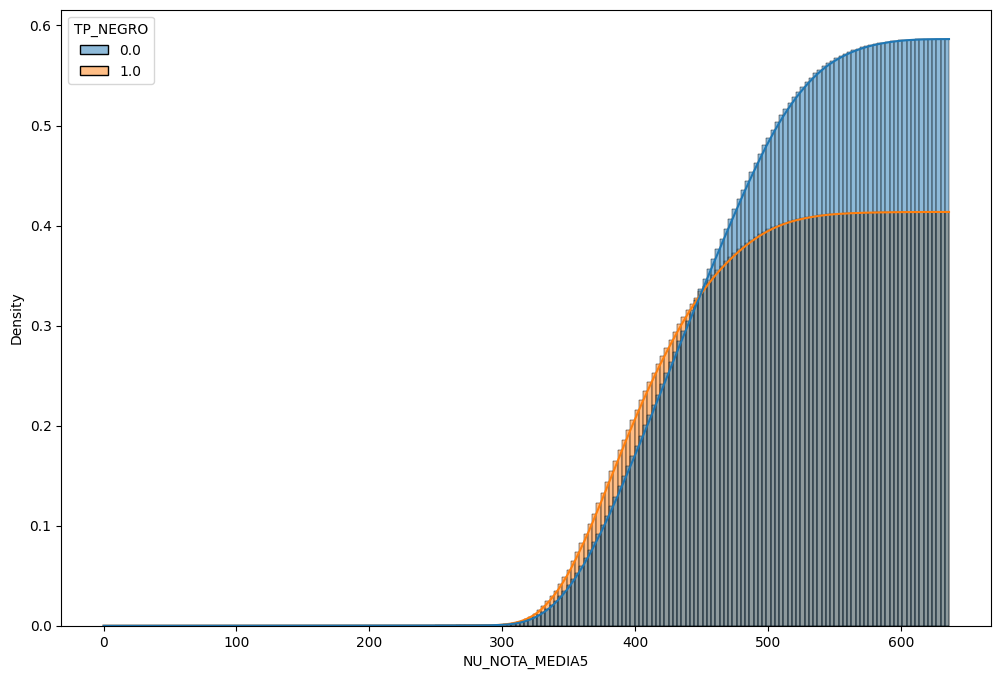

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df, x = "NU_NOTA_MEDIA5", hue="TP_NEGRO", kde=True, stat="density", cumulative=True)
plt.show()

No gráfico acima, observe que os Negros estacionam por volta de 420 ao passo que os outros chegam perto dos 600.

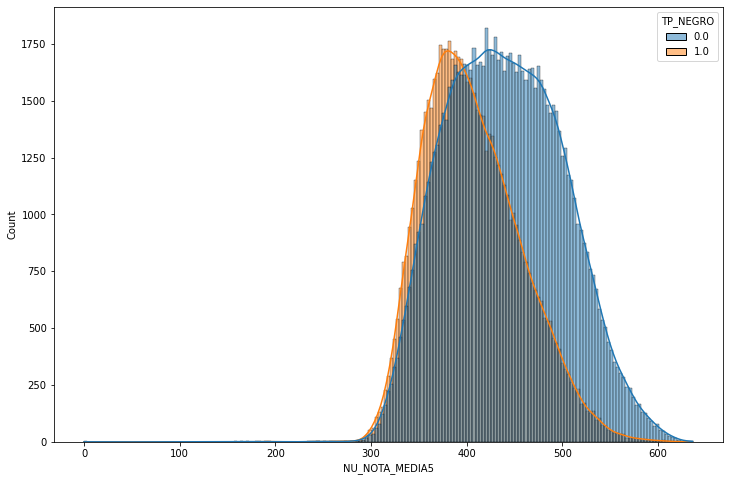

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df, x = "NU_NOTA_MEDIA5", hue="TP_NEGRO", kde=True)

Observe a evidente diferença de performance entre os Negros (mais à esquerda) e os outros.

# Onde estudam os melhores (=> Negros)

**ATENÇÃO**: Para fazer essa análise, ao invés de selecionar os inscritos que são moradores da cidade de São Paulo, vamos olhara para os inscritos que **estudam em São Paulo**.

In [ ]:
# Onde estudam os melhores
#mantem apenas os dados dos alunos do município de São Paulo
df2 = dados[dados['CO_MUNICIPIO_ESC'] == '3550308']


In [ ]:
df2[' NU_INSCRICAO'].count()

52696

**52.696** **estudantes das escolas de São Paulo** se increveram para o ENEM 2019

In [ ]:
#mantem apenas as colunas de interesse para essa análise
df2 = df2[[' NU_INSCRICAO','CO_ESCOLA','NU_IDADE','TP_SEXO','TP_COR_RACA','TP_ESCOLA'
       ,'TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT'
       ,'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','CO_MUNICIPIO_RESIDENCIA','CO_MUNICIPIO_ESC','Q006','Q025 ']]


In [ ]:
df2.columns = ['NU_INSCRICAO','CO_ESCOLA','NU_IDADE','TP_SEXO','TP_COR_RACA','TP_ESCOLA'
       ,'TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT'
       ,'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','CO_MUNICIPIO_RESIDENCIA','CO_MUNICIPIO_ESC','Q006','Q025']


In [ ]:
df2['CO_ESCOLA'] = df2['CO_ESCOLA'].astype('string')
df2['TP_SEXO'] = df2['TP_SEXO'].astype('string')
df2["NU_NOTA_CN"] =  pd.to_numeric(df2["NU_NOTA_CN"], errors='coerce')
df2["NU_NOTA_CH"] =  pd.to_numeric(df2["NU_NOTA_CH"], errors='coerce')
df2["NU_NOTA_LC"] =  pd.to_numeric(df2["NU_NOTA_LC"], errors='coerce')
df2["NU_NOTA_MT"] =  pd.to_numeric(df2["NU_NOTA_MT"], errors='coerce')
df2["NU_NOTA_REDACAO"] =  pd.to_numeric(df2["NU_NOTA_REDACAO"], errors='coerce')
df2['CO_MUNICIPIO_ESC'] = df2['CO_MUNICIPIO_ESC'].astype('string')
df2['Q006'] = df2['Q006'].astype('string')
df2['Q025'] = df2['Q025'].astype('string')

df2["NU_NOTA_TOTAL4"] = df2["NU_NOTA_CN"]+df2["NU_NOTA_CH"]+df2["NU_NOTA_MT"]+df2["NU_NOTA_LC"]
df2["NU_NOTA_TOTAL5"] = df2["NU_NOTA_CN"]+df2["NU_NOTA_CH"]+df2["NU_NOTA_MT"]+df2["NU_NOTA_LC"]+df2["NU_NOTA_MT"]
df2["NU_NOTA_MEDIA4"] = (df2["NU_NOTA_CN"]+df2["NU_NOTA_CH"]+df2["NU_NOTA_MT"]+df2["NU_NOTA_LC"]) / 4
df2["NU_NOTA_MEDIA5"] = (df2["NU_NOTA_CN"]+df2["NU_NOTA_CH"]+df2["NU_NOTA_MT"]+df2["NU_NOTA_LC"]) / 5

#cria um indicador se é Raça Negra ou não
df2.loc[(df2['TP_COR_RACA'] == 2) | (df2['TP_COR_RACA'] == 3), 'TP_NEGRO'] = 1
df2.loc[(df2['TP_COR_RACA'] == 0) | (df2['TP_COR_RACA'] == 1) | (df2['TP_COR_RACA'] == 4) | (df2['TP_COR_RACA'] == 5), 'TP_NEGRO'] = 0
#df2[['TP_NEGRO','TP_COR_RACA']]


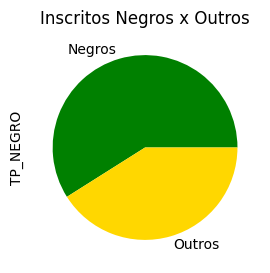

In [ ]:
plt.rcdefaults()
labels = ['Negros', 'Outros']
colors = ['green', 'gold']
df2['TP_NEGRO'].value_counts().plot.pie(figsize=(5,3), colors=colors, labels= labels)
plt.title("Inscritos Negros x Outros")
#plt.legend(labels, loc="best")
plt.show()


##**Ausentes**



Aqui vamos identificar em que escolas esses alunos estudam

In [ ]:
df2ausentes = df2.query('TP_PRESENCA_CN == 0 & TP_PRESENCA_CH == 0 & TP_PRESENCA_LC == 0 & TP_PRESENCA_MT == 0')

In [ ]:
df2ausentes['NU_INSCRICAO'].count()


6253

In [ ]:
6233 /  52696 

0.11828222255958706

Entre os **52.696 inscritos** da cidade de São Paulo, 6.233 **não compareceram** (**11.8%**), ou seja, a abstência foi menor em relação conjunto de inscritos residentes em São Paulo analisado anteriormente.

In [ ]:
#vamos considerar apenas quem fez a prova
df2 = df2.query(('TP_PRESENCA_CN == 1| TP_PRESENCA_CH == 1 | TP_PRESENCA_LC == 1 | TP_PRESENCA_MT == 1'))


In [ ]:
df2['NU_INSCRICAO'].count()

46400

##Dados das escolas
Para enriquecer a nossa análise, vamos pegar dados adicionais das escolas a partir do Centro de Estudos da Metrópole - FFLCH/USP (http://centrodametropole.fflch.usp.br/pt-br)


In [ ]:
#baixando dados de escolas
!wget https://raw.githubusercontent.com/mmitie/dados/main/Escolas2016_RMSP_CEM.csv
dadosEscolas = pd.read_csv('Escolas2016_RMSP_CEM.csv', sep=';', na_filter=False)
dadosEscolas.columns = ['X','Y','CODESC','NOME_ESCOLA','END_ESCOLA','NUM_ESCOLA','BAIRRO','NOMDIST']
dadosEscolas['END_ESCOLA'] = dadosEscolas['END_ESCOLA']+' '+dadosEscolas['NUM_ESCOLA']

--2020-10-26 01:31:30--  https://raw.githubusercontent.com/mmitie/dados/main/Escolas2016_RMSP_CEM.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 755397 (738K) [text/plain]
Saving to: ‘Escolas2016_RMSP_CEM.csv.3’

Escolas2016_RMSP_CE 100%[===================>] 737.69K  --.-KB/s    in 0.08s   

2020-10-26 01:31:30 (9.04 MB/s) - ‘Escolas2016_RMSP_CEM.csv.3’ saved [755397/755397]



In [ ]:
dadosEscolas['CODESC'] = dadosEscolas['CODESC'].astype('string')
dadosEscolas['NOME_ESCOLA'] = dadosEscolas['NOME_ESCOLA'].astype('string')
dadosEscolas['END_ESCOLA'] = dadosEscolas['END_ESCOLA'].astype('string')
dadosEscolas['BAIRRO'] = dadosEscolas['BAIRRO'].astype('string')
dadosEscolas['NOMDIST'] = dadosEscolas['NOMDIST'].astype('string')


In [ ]:
df2 = pd.merge(left=df2, right=dadosEscolas, left_on='CO_ESCOLA', right_on='CODESC')

In [ ]:
df2

,NU_INSCRICAO,CO_ESCOLA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,CO_MUNICIPIO_RESIDENCIA,CO_MUNICIPIO_ESC,Q006,Q025,NU_NOTA_TOTAL4,NU_NOTA_TOTAL5,NU_NOTA_MEDIA4,NU_NOTA_MEDIA5,TP_NEGRO,X,Y,CODESC,NOME_ESCOLA,END_ESCOLA,NUM_ESCOLA,BAIRRO,NOMDIST
0,190001194936,35132287,18,F,1,3,1,1,1,1,585.9,625.6,597.4,491.0,760.0,3550308,3550308,N,B,2299.9,2790.9,574.975,459.98,0.0,-46.642436,-23.573636,35132287,POLIEDRO COLEGIO,BERNARDINO DE CAMPOS 270,270,PARAISO,VILA MARIANA
1,190001607733,35132287,17,M,3,3,1,1,1,1,769.3,634.3,616.9,930.5,920.0,3550308,3550308,M,B,2951.0,3881.5,737.750,590.20,1.0,-46.642436,-23.573636,35132287,POLIEDRO COLEGIO,BERNARDINO DE CAMPOS 270,270,PARAISO,VILA MARIANA
2,190001616799,35132287,17,F,1,3,1,1,1,1,651.5,647.1,601.9,663.9,780.0,3550308,3550308,P,B,2564.4,3228.3,641.100,512.88,0.0,-46.642436,-23.573636,35132287,POLIEDRO COLEGIO,BERNARDINO DE CAMPOS 270,270,PARAISO,VILA MARIANA
3,190001799312,35132287,17,F,1,3,1,1,1,1,565.3,552.9,599.2,771.9,800.0,3550308,3550308,E,B,2489.3,3261.2,622.325,497.86,0.0,-46.642436,-23.573636,35132287,POLIEDRO COLEGIO,BERNARDINO DE CAMPOS 270,270,PARAISO,VILA MARIANA
4,190001809044,35132287,18,F,1,3,1,1,1,1,585.6,615.4,627.7,663.1,960.0,3550308,3550308,P,B,2491.8,3154.9,622.950,498.36,0.0,-46.642436,-23.573636,35132287,POLIEDRO COLEGIO,BERNARDINO DE CAMPOS 270,270,PARAISO,VILA MARIANA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46228,190005990801,35135562,18,M,3,2,1,1,1,1,557.3,467.2,562.9,622.3,540.0,3550308,3550308,H,B,2209.7,2832.0,552.425,441.94,1.0,-46.464305,-23.607879,35135562,SANTA BARBARA COLEGIO,RUA DEINOS 165,165,STA BARBARA,SAO MATEUS
46229,190005997480,35257497,27,F,1,2,1,1,1,1,453.0,487.6,532.6,434.2,380.0,3509007,3550308,H,B,1907.4,2341.6,476.850,381.48,0.0,-46.642405,-23.536772,35257497,UNIVERSAL BRASILEIRO INSTITUTO,RIO BRANCO 781,781,CAMPOS ELISEOS,REPUBLICA
46230,190006010648,35107827,17,F,0,3,1,1,1,1,495.4,475.6,507.5,425.7,440.0,3550308,3550308,C,A,1904.2,2329.9,476.050,380.84,0.0,-46.760826,-23.657872,35107827,LIDIA FLORENCIO CAMACHO PROFA INSTITUTO,AV AGOSTINHO RUBIN 449,449,JD GERMANIA,CAPAO REDONDO
46231,190006012142,35258428,22,F,3,2,1,1,1,1,495.7,533.1,500.6,453.9,340.0,3550308,3550308,D,A,1983.3,2437.2,495.825,396.66,1.0,-46.763795,-23.659357,35258428,CIEJA CENTRO INT ED JOVENS E ADULTOS - CAMPO L...,CABO ESTACIO DA CONCEICAO 176,176,PARQUE MARIA HELENA,CAPAO REDONDO


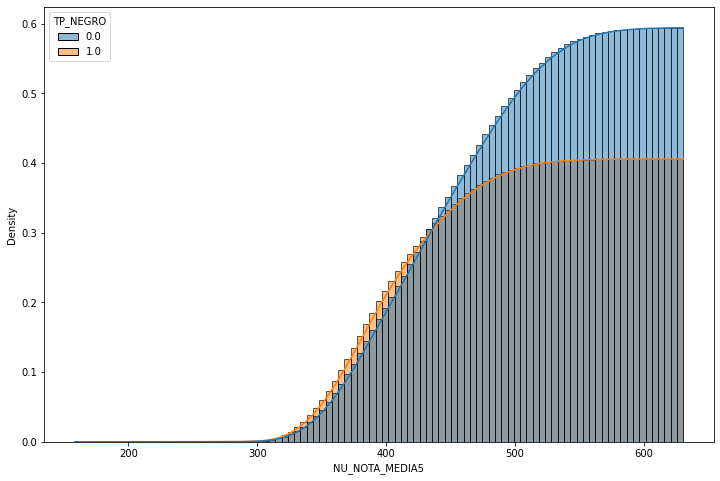

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df2, x = "NU_NOTA_MEDIA5", hue="TP_NEGRO", kde=True, stat="density", cumulative=True)

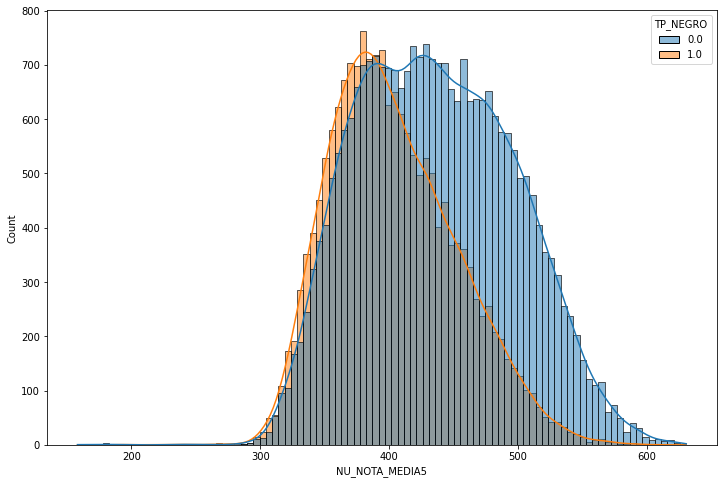

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df2, x = "NU_NOTA_MEDIA5", hue="TP_NEGRO", kde=True)

Comparando os alunos das escolas de São Paulo, a diferença de performance geral dos Negros em relação aos outros se manteve

## Nota média

Porém, onde estudam os alunos Negros que tiraram a nota média das 5 provas acima de 500 pontos?

In [ ]:
df2.query("TP_NEGRO == 1 & NU_NOTA_MEDIA5 > 500")["NOME_ESCOLA"].value_counts().sort_index()

14 DE JULHO COLEGIO                       1
ADOLFO GORDO SENADOR                      1
ADVENTISTA DA LIBERDADE COLEGIO           1
ADVENTISTA DE CAMPO LIMPO COLEGIO         1
AFAM COLEGIO UNIDADE SAO MIGUEL           1
                                         ..
WALTER BELIAN ESCOLA TECNICA             12
WELLINGTON CENTRO DE ENSINO INTEGRADO     1
WILSON ROBERTO SIMONINI PROF              1
ZONA LESTE ETEC DA                        7
ZONA SUL ETE                              6
Name: NOME_ESCOLA, Length: 243, dtype: Int64

Apareceram 243 escolas.

Porém, onde estudam os alunos Negros que tiraram a nota média das 5 provas acima de 600 pontos?

In [ ]:
df2.query("TP_NEGRO == 1 & NU_NOTA_MEDIA5 > 600")["NOME_ESCOLA"].value_counts().sort_index()
#22270

ETAPA COLEGIO DE EFM    1
Name: NOME_ESCOLA, dtype: Int64

Apenas 1 escola (ETAPA COLEGIO DE EF).

## Nota de Redação

Quem foi bem na redação?

In [ ]:
df2.query("TP_NEGRO == 1 &  NU_NOTA_REDACAO >= 700")["NOME_ESCOLA"].value_counts()

GETULIO VARGAS ETE                        52
GUARACY SILVEIRA ETE                      37
SAO LUIS COLEGIO UNIDADE II               35
CAMARGO ARANHA PROF ETE                   35
JOSE VIEIRA DE MORAES PROF                35
                                          ..
SAO MIGUEL ARCANJO COLEGIO FRANCISCANO     1
PLINIO BARRETO                             1
PIO TELLES PEIXOTO PROFESSOR               1
EGO ESCOLA                                 1
JOSE BUSTAMANTE DEPUTADO                   1
Name: NOME_ESCOLA, Length: 700, dtype: Int64

Um montão de gente e um montão de escolas. Vamos analisar isso melhor...

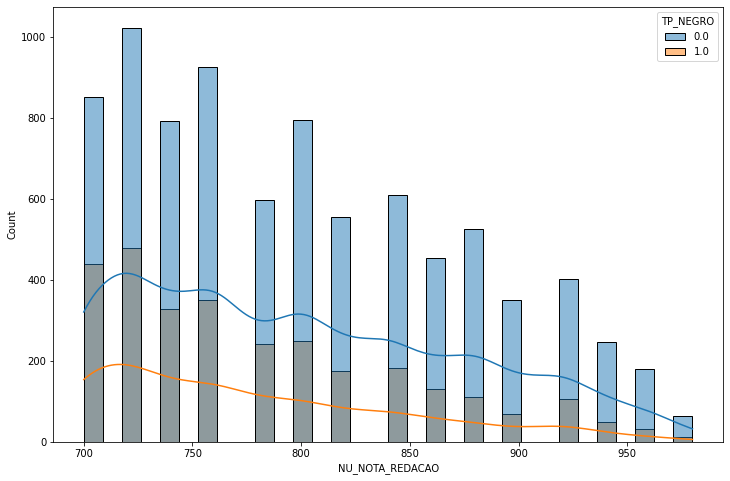

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df2.query("NU_NOTA_REDACAO >= 700"), x = "NU_NOTA_REDACAO", hue = "TP_NEGRO", kde=True)


Vamos dar uma olhada nas escolas com Negros indo realmente bem (> 900) em redação?

In [ ]:
df2.query("TP_NEGRO == 1 &  NU_NOTA_REDACAO >= 900")["NOME_ESCOLA"].value_counts()

WALTER BELIAN ESCOLA TECNICA                            7
GUARACY SILVEIRA ETE                                    7
LICEU DE ARTES E OFICIOS DE SAO PAULO ESCOLA TECNICA    7
SESI 415 CENTRO EDUCACIONAL                             6
ITAQUERA ETE DE                                         6
                                                       ..
MARIA JUVENAL HOMEM DE MELLO PROFA                      1
VERA CRUZ ESCOLA UNIDDE III                             1
PEDRO TAQUES                                            1
MARIA ZILDA GAMBA NATEL                                 1
GABRIEL ORTIZ PROFESSOR                                 1
Name: NOME_ESCOLA, Length: 165, dtype: Int64

O negócio é ficar de olho nos lugares onde há Negros que se destacam, pra servirem de exemplo e inspiração!!!

#Nota Final
É uma questão de justiça social. A desigualdade é evidente. Viva as cotas e as ações afirmativas! #BlackLivesMatter !!!

#Agradecimentos
Parabéns! Você chegou ao final dessa nova jornada rumo aos dados do ENEM, sob uma ótica #blacklifesmatter !!!

Muito obrigado pela sua participação. Espero que você tenha se divertido. 
Até mais!


by Miriam Mitie



ImersãoDados Alura 2020